___

#### Rick Fontenot
___


In [1825]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)

import os
import sys
import tempfile
import mimetypes
import webbrowser

# Import the email modules we'll need
from email import policy
from email.parser import BytesParser

import re
import email

import missingno as msno



## Test reading in a single file as an example:


In [1227]:
sample_file = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/easy_ham/00001.7c53336b37003a9286aba55d2945844c'

In [1228]:
with open(sample_file, "r",encoding= 'utf-8', errors='ignore') as f:
    message_imported = email.message_from_file(f).get_payload().replace("\n"," ")

message_imported

'    Date:        Wed, 21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>     Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>     | I can\'t reproduce this error.  For me it is very repeatable... (like every time, without fail).  This is the debug log of the pick happening ...  18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ...  Note, if I run the pick command by hand ...  delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit  That\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m using is ...  delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 1

In [1229]:
#This code model is from https://docs.python.org/3/library/email.examples.html

# In a real program you'd get the filename from the arguments.
with open(sample_file, 'rb') as fp:
    msg = BytesParser(policy=policy.default).parse(fp)

# Now the header items can be accessed as a dictionary, and any non-ASCII will
# be converted to unicode:
print('To:', msg['to'])
print('From:', msg['from'])
print('Subject:', msg['subject'])

To: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>
From: Robert Elz <kre@munnari.OZ.AU>
Subject: Re: New Sequences Window


In [1230]:
msg.keys()

['Return-Path',
 'Delivered-To',
 'Received',
 'Received',
 'Received',
 'Received',
 'Delivered-To',
 'Received',
 'Received',
 'Received',
 'Received',
 'Received',
 'Received',
 'From',
 'To',
 'Cc',
 'Subject',
 'In-Reply-To',
 'References',
 'MIME-Version',
 'Content-Type',
 'Message-Id',
 'X-Loop',
 'Sender',
 'Errors-To',
 'X-Beenthere',
 'X-Mailman-Version',
 'Precedence',
 'List-Help',
 'List-Post',
 'List-Subscribe',
 'List-Id',
 'List-Unsubscribe',
 'List-Archive',
 'Date']

In [1231]:
msg[ 'Content-Type']

'text/plain; charset="us-ascii"'

In [1232]:
msg['Subject']

'Re: New Sequences Window'

Try to extract just the subject

In [1233]:
with open(sample_file, 'rb') as fp:
    subject = BytesParser(policy=policy.default).parse(fp)['Subject']

subject

'Re: New Sequences Window'

In [1234]:
with open(sample_file, 'rb') as fp:
    file_id = BytesParser(policy=policy.default).parse(fp)['Message-Id'].replace("<","").replace(">","")

file_id

'13258.1030015585@munnari.OZ.AU'

In [1235]:
from html.parser import HTMLParser
from bs4 import BeautifulSoup

## Now that we have a process for reading elements of a file, we will read in all the files from subfolders and organize into a data frame

### Easy Ham

In [1236]:
easy_ham_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/easy_ham/'

os.chdir(easy_ham_dir)
all_files = os.listdir()

easy_ham_df = pd.DataFrame(columns = ["file_id", "subject", "body"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        subject = BytesParser(policy=policy.default).parse(fp)['Subject']
    with open(file, "r",encoding= 'utf-8', errors='ignore') as f:
        msg = email.message_from_file(f)
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
    row = pd.Series((file_id,subject,body), index = easy_ham_df.columns)
    easy_ham_df = easy_ham_df.append(row, ignore_index=True)    

print(len(all_files))
print(easy_ham_df.shape)

easy_ham_df['Group']='easy_ham'
easy_ham_df['Is_Spam']=0
easy_ham_df.head(45)
   

5052
(5052, 3)


,file_id,subject,body,Group,Is_Spam
0,2170.78c282a5e417d6d231dc75aa8588ebb7,Priceless Rubens works stolen in raid on mansion,"URL: http://www.newsisfree.com/click/-1,838114...",easy_ham,0
1,0461.7609029b07acf65f40bd93882aa35887,Making a mesh on the move,\nhttp://www.guardian.co.uk/Print/0%2c3858%2c4...,easy_ham,0
2,00769.25bf9a767b5db0ed93f03c1637281663,Re: liberal defnitions,"\nIn a message dated 9/24/2002 11:24:58 AM, ja...",easy_ham,0
3,01074.8590d61ac0aeeadb58dc2f2ba776c406,problems with apt update,"Hiya, I always seem to get errors when I do an...",easy_ham,0
4,02479.14365bcad3a60fcf24c5c1813f6291fb,Re: Are bad developer libraries the problem wi...,\nI don't know how one can expect better and m...,easy_ham,0
5,1077.5967a2892063a3470f32596403b095aa,Re: Sorting,> > You're probably running exmh on a local ma...,easy_ham,0
6,1000.348e8a82897b05d584de019f4dd5c7e2,RE: Java is for kiddies,"On Sun, 1 Sep 2002, Reza B'Far (eBuilt) wrote:...",easy_ham,0
7,2125.ee1e93366c2199584cfbd4cbb353d918,Skateboarder drives-through Subway. With his face,"URL: http://www.newsisfree.com/click/-5,829698...",easy_ham,0
8,0401.9ab0bcc81e70d6930acfefc2854a0172,Re: Canadians,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",easy_ham,0
9,0502.9e78d7d003ceeef52c70ac7e7b786ef9,Re: Ouch... [Bebergflame],Adam Beberg writes:\n> Shouldn't a politician ...,easy_ham,0


In [1237]:
easy_ham_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/easy_ham/'

os.chdir(easy_ham_dir)
all_files = os.listdir()

easy_ham_types = pd.DataFrame(columns = ["file_id", "Content-Type"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        type = BytesParser(policy=policy.default).parse(fp)['Content-Type']
    row = pd.Series((file_id,type), index = easy_ham_types.columns)
    easy_ham_types = easy_ham_types.append(row, ignore_index=True)    

print(len(all_files))
print(easy_ham_types.shape)



5052
(5052, 2)


In [1238]:
easy_ham_types.head(45)

,file_id,Content-Type
0,2170.78c282a5e417d6d231dc75aa8588ebb7,"text/plain; encoding=""utf-8"""
1,0461.7609029b07acf65f40bd93882aa35887,"TEXT/PLAIN; charset=""ISO-8859-1"""
2,00769.25bf9a767b5db0ed93f03c1637281663,"text/plain; charset=""US-ASCII"""
3,01074.8590d61ac0aeeadb58dc2f2ba776c406,"text/plain; charset=""us-ascii""; format=""flowed"""
4,02479.14365bcad3a60fcf24c5c1813f6291fb,"text/plain; charset=""us-ascii"""
5,1077.5967a2892063a3470f32596403b095aa,"text/plain; charset=""us-ascii"""
6,1000.348e8a82897b05d584de019f4dd5c7e2,"TEXT/PLAIN; charset=""US-ASCII"""
7,2125.ee1e93366c2199584cfbd4cbb353d918,"text/plain; encoding=""utf-8"""
8,0401.9ab0bcc81e70d6930acfefc2854a0172,"text/plain; charset=""us-ascii"""
9,0502.9e78d7d003ceeef52c70ac7e7b786ef9,None


In [1239]:
easy_ham_df[easy_ham_df.body.isna()].count()


file_id    0
subject    0
body       0
Group      0
Is_Spam    0
dtype: int64

## Easy Ham 2

In [1240]:
easy_ham_2_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/easy_ham_2/'

os.chdir(easy_ham_2_dir)
all_files = os.listdir()

easy_ham_2_df = pd.DataFrame(columns = ["file_id", "subject", "body"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        subject = BytesParser(policy=policy.default).parse(fp)['Subject']
    with open(file, "r",encoding= 'utf-8', errors='ignore') as f:
        msg = email.message_from_file(f)
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
    row = pd.Series((file_id,subject,body), index = easy_ham_2_df.columns)
    easy_ham_2_df = easy_ham_2_df.append(row, ignore_index=True)    

print(len(all_files))
print(easy_ham_2_df.shape)

easy_ham_2_df['Group']='easy_ham_2'
easy_ham_2_df['Is_Spam']=0
easy_ham_2_df.head(10)

1401
(1401, 3)


,file_id,subject,body,Group,Is_Spam
0,01128.efb36914ecb55d78a894591eff0843c5,Re: Ximian apt repos?,"On Sun, 21 Jul 2002 10:51:51 -0500\nBrian Fahr...",easy_ham_2,0
1,00659.02e6dd777f837798533eae8f3b6a0491,[WM] The MIME information you requested (last ...,----------------------------------------------...,easy_ham_2,0
2,00776.7df92458e9cf04b8873c406bde7d2fbe,A message for our times,"I'm not up to forking the text, but for your e...",easy_ham_2,0
3,00116.409b29c26edef06268b4bfa03ef1367a,Re: [ILUG] vanquishing the daemons of shell sc...,"On Sat, Jul 20, 2002 at 12:18:57PM +0100, Kenn...",easy_ham_2,0
4,00615.23556d88fcb1179b25083cfc41017f42,Re: [Razor-users] Using Razor with non-mbox files,"> ----- Original Message -----\n> Date: Thu, 0...",easy_ham_2,0
5,00715.c11e77af45a2debe41aed46b2be09d59,"Re: ""Ouch. Ouch. Ouch. Ouch. Ouch....""(was Re:...",\nMusic school jokes --\n\nAmerican conductor ...,easy_ham_2,0
6,01200.7cad0240e6c9e66d013ca8a7c2268871,Re: Pango problems,I find Gnome2 with Red Hat's Limbo to be quite...,easy_ham_2,0
7,00834.c820e444255bc80fafd01933f05703d6,Re: [Baseline] Raising chickens the high-tech way,\n\n> It also strikes me that it will not be v...,easy_ham_2,0
8,00568.4bfc868e8de382e58f6d9baee080b56a,Re: [Razor-users] report automation with pine?,"\n----- Original Message ----- \nFrom: ""Forres...",easy_ham_2,0
9,00439.4588d5306e105aa80c51978dfc505d3f,Re: [ILUG] expanding a string multiple times,"\nOn Pungenday, the 9th day of Bureaucracy, Pa...",easy_ham_2,0


## Hard Ham

In [1241]:
hard_ham_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/hard_ham/'

os.chdir(hard_ham_dir)
all_files = os.listdir()

hard_ham_df = pd.DataFrame(columns = ["file_id", "subject", "body"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        subject = BytesParser(policy=policy.default).parse(fp)['Subject']
    with open(file, "r",encoding= 'utf-8', errors='ignore') as f:
        msg = email.message_from_file(f)
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
    row = pd.Series((file_id,subject,body), index = hard_ham_df.columns)
    hard_ham_df = hard_ham_df.append(row, ignore_index=True)    

print(len(all_files))
print(hard_ham_df.shape)

hard_ham_df['Group']='hard_ham'
hard_ham_df['Is_Spam']=0
hard_ham_df.head(10)

501
(501, 3)


,file_id,subject,body,Group,Is_Spam
0,0035.4fe7648654fa3fa1ae5379894f00474f,NEWS.COM INVESTOR: Battered stocks regain ground,"If you run Pick, and then use the ""New FTOC"" b...",hard_ham,0
1,00113.1d37bdbcad4975b5012cc6d87a048ecf,[Lockergnome Windows Daily] Sticker Courtesy,"If you run Pick, and then use the ""New FTOC"" b...",hard_ham,0
2,00165.4e1923f1c9091dc00d79dfe004eedf26,Re: remove,"> Seriously though, it spurs the question: sho...",hard_ham,0
3,00044.b2f03a4d512deb2c4702a3bd60a4fd88,Great deals on perfect Summer cameras! (CNET S...,"> Seriously though, it spurs the question: sho...",hard_ham,0
4,00138.1bf66894faa2d923b2a673a016dc6afd,How Microsoft plans to take over your living r...,"> Seriously though, it spurs the question: sho...",hard_ham,0
5,0044.27a8944e81a2e9238f2de89eca51321d,[Lockergnome Tech Specialist] Geothermal Caff...,"> Seriously though, it spurs the question: sho...",hard_ham,0
6,00211.1ca67c3677fa0051ccfa27c756d32b5a,[NOVICE] pl/pgsql and returns timestamp type,"Hi all,\n\nI cannot to get this to run... I t...",hard_ham,0
7,00201.04e4c8ef93080eea4b11213262ece700,Ashfield Online 9/1/2002 by Aric McKeown,"Hi all,\n\nI cannot to get this to run... I t...",hard_ham,0
8,00013.15135df1ed8198dbea3fcd0cb8d071ae,"This week: Deck, Tex-Edit Plus, Boom","CNET | DOWNLOAD DISPATCH(Mac Edition)\nJuly 9,...",hard_ham,0
9,00019.e35a7a6a1a6bdd0d2e164db2f6a0e4ef,[Lockergnome Tech Specialist] Handprint Singing,"CNET | DOWNLOAD DISPATCH(Mac Edition)\nJuly 9,...",hard_ham,0


## Spam

In [1242]:
spam_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/spam/'

os.chdir(spam_dir)
all_files = os.listdir()

spam_df = pd.DataFrame(columns = ["file_id", "subject", "body"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        subject = BytesParser(policy=policy.default).parse(fp)['Subject']
    with open(file, "r",encoding= 'utf-8', errors='ignore') as f:
        msg = email.message_from_file(f)
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
    row = pd.Series((file_id,subject,body), index = spam_df.columns)
    spam_df = spam_df.append(row, ignore_index=True)    

print(len(all_files))
print(spam_df.shape)

spam_df['Group']='spam'
spam_df['Is_Spam']=1
spam_df.head(10)

1001
(1001, 3)


,file_id,subject,body,Group,Is_Spam
0,00249.5f45607c1bffe89f60ba1ec9f878039a,Let us find the right mortgage lender for you ...,"Dear Homeowner,\n \nInterest Rates are at thei...",spam,1
1,0355.94ebf637e4bd3db8a81c8ce68ecf681d,"Friend, Copy ANY DVD or Playstation Game with ...","Friend,Now you can copy DVD's and Games\nhttp:...",spam,1
2,0395.bb934e8b4c39d5eab38f828a26f760b4,5% Guaranteed for Eight Years,Pocket the newest 8 year annuity!\t Pocket th...,spam,1
3,0485.9021367278833179285091e5201f5854,Congratulations! You Get a Free Handheld Organ...,Pocket the newest 8 year annuity!\t Pocket th...,spam,1
4,00373.ebe8670ac56b04125c25100a36ab0510,PROTECT YOUR INFORMATION AND YOUR COMPUTER,ATTENTION: This is a MUST for ALL Computer Use...,spam,1
5,0343.0630afbe4ee1ffd0db0ffb81c6de98de,One of a kind Money maker! Try it for free!,ATTENTION: This is a MUST for ALL Computer Use...,spam,1
6,00214.1367039e50dc6b7adb0f2aa8aba83216,We Dare You to Find a Better Annuity,We dare you...\n Try to find a better annuity...,spam,1
7,0125.44381546181fc6c5d7ea59e917f232c5,Online Doctors will fill your Viagra Prescript...,YOUR SEX DRIVE SHOULD NEVER BE SECOND ON THE L...,spam,1
8,00210.050ffd105bd4e006771ee63cabc59978,"$14.95 per year for .COM, .BIZ, and .INFO exte...",IMPORTANT INFORMATION:\n\nThe new domain names...,spam,1
9,0108.4506c2ef846b80b9a7beb90315b22701,Take your Marketing to the Next Level,IMPORTANT INFORMATION:\n\nThe new domain names...,spam,1


## Spam 2

In [1243]:
spam_2_dir = '/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 3/data/spam_2/'

os.chdir(spam_2_dir)
all_files = os.listdir()

spam_2_df = pd.DataFrame(columns = ["file_id", "subject", "body"])

for file in all_files:
    file_id=file
    with open(file, 'rb') as fp:
        subject = BytesParser(policy=policy.default).parse(fp)['Subject']
    with open(file, "r",encoding= 'utf-8', errors='ignore') as f:
        msg = email.message_from_file(f)
        for part in msg.walk():
            # each part is a either non-multipart, or another multipart message
            # # that contains further parts... Message is organized like a tree
            if part.get_content_type() == 'text/plain':
                body = part.get_payload()
    row = pd.Series((file_id,subject,body), index = spam_2_df.columns)
    spam_2_df = spam_2_df.append(row, ignore_index=True)    

print(len(all_files))
print(spam_2_df.shape)

spam_2_df['Group']='spam_2'
spam_2_df['Is_Spam']=1
spam_2_df.head(10)

1398
(1398, 3)


,file_id,subject,body,Group,Is_Spam
0,01246.d0ee9c7ebf9d953b21de9414cc96c2f9,Dialogue et Rencontre ? Rejoins nous !,Venez rencontrer l'ame soeur sur LOVEIMPACT.co...,spam_2,1
1,01099.f33c6cb5a233f19e1dc1956871c50681,Take your love life to the next level ...,Venez rencontrer l'ame soeur sur LOVEIMPACT.co...,spam_2,1
2,00346.d93a823fb3350a5da8f0c612ce1156cd,[dcms-dev] MY INHERITANCE,"Date:May 16,2002. \nEmail:edum@hkem.com. \n\nD...",spam_2,1
3,00012.cb9c9f2a25196f5b16512338625a85b4,Gain Major Cash,\n<HTML>\n<BODY>\n\nOWN YOUR VERY OWN FREE CAS...,spam_2,1
4,00993.32d00ccd0a831830838667fed1371d5f,"< Make $50,000 in 90 Days Sending Emails at Ho...","\nHi,\n\nYou can make $50,000 or more in the n...",spam_2,1
5,01393.e7d7a58f2c561c6f71fe95c64a7f5f35,Reverse Aging While Burning Fat,"\nHi,\n\nYou can make $50,000 or more in the n...",spam_2,1
6,01077.526ad4ce12f3ef73a4b4eae0f211e2c9,Checking Account update,Special situation trading Advisory\n\nDear Val...,spam_2,1
7,00722.1ec5e1f05520ad5119de960f77f965d1,[SA] [Ginger] has sent you a webcam invitation!,Dear Dr. Schaefer:\n\nI would greatly apprecia...,spam_2,1
8,01195.2e0668d1365c631aa09d21c813ce013f,HELP WANTED. WORK FROM HOME. FREE INFO,WE NEED HELP. We are a 14 year old fortune 50...,spam_2,1
9,00234.64c94421011e896adab852386cd314d8,Joke-Of -The- Day,WE NEED HELP. We are a 14 year old fortune 50...,spam_2,1


In [2109]:
messages_df = pd.concat([easy_ham_df, easy_ham_2_df, hard_ham_df, spam_df, spam_2_df], axis=0)

In [2110]:
print(messages_df.shape)

(9353, 5)


easy_ham = 5052
easy_ham_2 = 1401
hard_ham = 501
Spam = 1001
spam_2 = 1398

Total = 9353

### Our dataframe has 9353 records matching the total number of files

In [2111]:
messages_df.head(45)

,file_id,subject,body,Group,Is_Spam
0,2170.78c282a5e417d6d231dc75aa8588ebb7,Priceless Rubens works stolen in raid on mansion,"URL: http://www.newsisfree.com/click/-1,838114...",easy_ham,0
1,0461.7609029b07acf65f40bd93882aa35887,Making a mesh on the move,\nhttp://www.guardian.co.uk/Print/0%2c3858%2c4...,easy_ham,0
2,00769.25bf9a767b5db0ed93f03c1637281663,Re: liberal defnitions,"\nIn a message dated 9/24/2002 11:24:58 AM, ja...",easy_ham,0
3,01074.8590d61ac0aeeadb58dc2f2ba776c406,problems with apt update,"Hiya, I always seem to get errors when I do an...",easy_ham,0
4,02479.14365bcad3a60fcf24c5c1813f6291fb,Re: Are bad developer libraries the problem wi...,\nI don't know how one can expect better and m...,easy_ham,0
5,1077.5967a2892063a3470f32596403b095aa,Re: Sorting,> > You're probably running exmh on a local ma...,easy_ham,0
6,1000.348e8a82897b05d584de019f4dd5c7e2,RE: Java is for kiddies,"On Sun, 1 Sep 2002, Reza B'Far (eBuilt) wrote:...",easy_ham,0
7,2125.ee1e93366c2199584cfbd4cbb353d918,Skateboarder drives-through Subway. With his face,"URL: http://www.newsisfree.com/click/-5,829698...",easy_ham,0
8,0401.9ab0bcc81e70d6930acfefc2854a0172,Re: Canadians,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",easy_ham,0
9,0502.9e78d7d003ceeef52c70ac7e7b786ef9,Re: Ouch... [Bebergflame],Adam Beberg writes:\n> Shouldn't a politician ...,easy_ham,0


In [2112]:
messages_df[messages_df.body.isna()].head()

,file_id,subject,body,Group,Is_Spam


In [2113]:
body_44 = messages_df.loc[44,'body']
str(body_44)


'44    On Fri, Aug 23, 2002 at 03:03:05PM -0400, Rose...\n44    On Sat 27 Jul 2002 01:57, you wrote:\\n> On Fri...\n44    Linux-Announce Digest #180, Volume #4         ...\n44     Outstanding\\n Opportunities\\n For Premier Pro...\n44    Below is the result of your feedback form.  It...\nName: body, dtype: object'

### Remove '/n' from body and subject

In [2114]:
messages_df['body'] = messages_df['body'].replace("\n"," ",regex=True)
messages_df['subject'] = messages_df['subject'].replace("\n"," ",regex=True)
messages_df['body'] = messages_df['body'].replace("\t"," ",regex=True)
messages_df['subject'] = messages_df['subject'].replace("\t"," ",regex=True)
messages_df.head(14)

,file_id,subject,body,Group,Is_Spam
0,2170.78c282a5e417d6d231dc75aa8588ebb7,Priceless Rubens works stolen in raid on mansion,"URL: http://www.newsisfree.com/click/-1,838114...",easy_ham,0
1,0461.7609029b07acf65f40bd93882aa35887,Making a mesh on the move,http://www.guardian.co.uk/Print/0%2c3858%2c44...,easy_ham,0
2,00769.25bf9a767b5db0ed93f03c1637281663,Re: liberal defnitions,"In a message dated 9/24/2002 11:24:58 AM, jam...",easy_ham,0
3,01074.8590d61ac0aeeadb58dc2f2ba776c406,problems with apt update,"Hiya, I always seem to get errors when I do an...",easy_ham,0
4,02479.14365bcad3a60fcf24c5c1813f6291fb,Re: Are bad developer libraries the problem wi...,I don't know how one can expect better and mo...,easy_ham,0
5,1077.5967a2892063a3470f32596403b095aa,Re: Sorting,> > You're probably running exmh on a local ma...,easy_ham,0
6,1000.348e8a82897b05d584de019f4dd5c7e2,RE: Java is for kiddies,"On Sun, 1 Sep 2002, Reza B'Far (eBuilt) wrote:...",easy_ham,0
7,2125.ee1e93366c2199584cfbd4cbb353d918,Skateboarder drives-through Subway. With his face,"URL: http://www.newsisfree.com/click/-5,829698...",easy_ham,0
8,0401.9ab0bcc81e70d6930acfefc2854a0172,Re: Canadians,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",easy_ham,0
9,0502.9e78d7d003ceeef52c70ac7e7b786ef9,Re: Ouch... [Bebergflame],Adam Beberg writes: > Shouldn't a politician k...,easy_ham,0


In [2115]:
messages_df[messages_df.body.isna()].head()

,file_id,subject,body,Group,Is_Spam


In [2116]:
messages_df.groupby('Is_Spam').count()

,file_id,subject,body,Group
Is_Spam,,,,
0,6954,6944,6954,6954
1,2399,2397,2399,2399


(array([  0.,   7.,  50., 442., 511., 443., 521., 505., 525., 566., 502.,
        412.]),
 array([  -1,    0,    1,  100,  200,  300,  400,  500,  600,  700,  800,
         900, 1000]),
 <BarContainer object of 12 artists>)

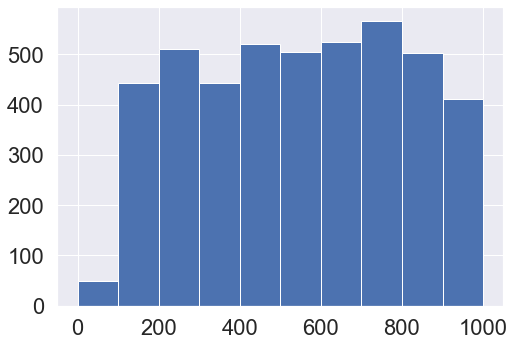

In [2117]:
body_lengths= []

for i in messages_df.body:
    if len(i)==0: print(i)
    body_lengths.append(len(i))

bins_list = [-1, 0, 1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.hist(body_lengths, bins = bins_list)

In [2118]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(messages_df.body.apply(lambda x: np.str_(x)))

body_counts = (vectorizer.vocabulary_)
body_counts = pd.DataFrame.from_dict(body_counts, orient='index')
body_counts.reset_index(inplace=True)
body_counts = body_counts.rename(columns = {'index':'Word'})
body_counts = body_counts.rename(columns={body_counts.columns[1]: 'count'})
body_counts = body_counts.sort_values(by='count', key=abs, ascending=False)

body_counts.head(20)

,Word,count
60417,𬣤jӡa,76395
60430,𬣡b,76394
62071,쵥λ,76393
60404,줽ǥx,76392
62086,죺ʹҵʾչ,76391
66206,隊x,76390
75545,磺塢չ塢,76389
75526,汾ϵйэաκⱥʱʮ,76388
62085,塵ӹ,76387
75547,塢塢ݮ塢塢ȵȡ繫,76386


In [2119]:
body_counts.tail(20)

,Word,count
52153,0000037,19
52307,0000035,18
33769,00000254,17
51325,0000023,16
52922,0000020,15
53999,0000018,14
50910,0000016,13
51113,0000015,12
52346,0000004,11
52766,0000002,10


In [2120]:
body_counts = body_counts.sort_values(by='Word', ascending=False)
body_counts.head(10)

,Word,count
60417,𬣤jӡa,76395
60430,𬣡b,76394
62071,쵥λ,76393
60404,줽ǥx,76392
62086,죺ʹҵʾչ,76391
66206,隊x,76390
75545,磺塢չ塢,76389
75526,汾ϵйэաκⱥʱʮ,76388
62085,塵ӹ,76387
75547,塢塢ݮ塢塢ȵȡ繫,76386


# Should these strange characters be removed? 
They could be important, let's check if they are high count in both spam and not-spam messages

In [2121]:
ham_body = messages_df[messages_df['Is_Spam'] == 0]

vectorizer.fit(ham_body.body.apply(lambda x: np.str_(x)))

ham_body_counts = (vectorizer.vocabulary_)
ham_body_counts = pd.DataFrame.from_dict(ham_body_counts, orient='index')
ham_body_counts.reset_index(inplace=True)
ham_body_counts = ham_body_counts.rename(columns = {'index':'Word'})
ham_body_counts = ham_body_counts.rename(columns={ham_body_counts.columns[1]: 'count'})
ham_body_counts = ham_body_counts.sort_values(by='count', key=abs, ascending=False)

ham_body_counts.head(20)

,Word,count
37566,ű__,58617
9165,zzzzteana,58616
36286,zzzzcc,58615
14451,zzzz,58614
9200,zzzlist,58613
55606,zzzason,58612
55423,zzz,58611
33266,zzmp3,58610
19155,zyxel,58609
48213,zytel,58608


In [2122]:
spam_body = messages_df[messages_df['Is_Spam'] == 1]

vectorizer.fit(spam_body.body.apply(lambda x: np.str_(x)))

spam_body_counts = (vectorizer.vocabulary_)
spam_body_counts = pd.DataFrame.from_dict(spam_body_counts, orient='index')
spam_body_counts.reset_index(inplace=True)
spam_body_counts = spam_body_counts.rename(columns = {'index':'Word'})
spam_body_counts = spam_body_counts.rename(columns={spam_body_counts.columns[1]: 'count'})
spam_body_counts = spam_body_counts.sort_values(by='count', key=abs, ascending=False)

spam_body_counts.head(20)

,Word,count
5683,𬣤jӡa,29957
5700,𬣡b,29956
9833,쵥λ,29955
5668,줽ǥx,29954
9854,죺ʹҵʾչ,29953
14094,隊x,29952
28686,磺塢չ塢,29951
28667,汾ϵйэաκⱥʱʮ,29950
9853,塵ӹ,29949
28688,塢塢ݮ塢塢ȵȡ繫,29948


The sepcial characters seem to be more prevalent in spam messages so they could be important predictors, we will keep them and use tf-idf vectorizer instead of count vectorizer

In [2123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import time

Split the host dataframe to preserve a validation set for comparing models after tuning on CV of initial train/test split. We are using the stratified shuffle split so the validation set is representative of classes, as well as random_state so the if this code is run multiple times we get the same splits for consistentcySplit the host dataframe to preserve a validation set for comparing models after tuning on CV of initial train/test split. We are using the stratified shuffle split so the validation set is representative of classes, as well as random_state so the if this code is run multiple times we get the same splits for consistentcy

In [2124]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(messages_df, messages_df.Is_Spam):
    email_modeling = messages_df.iloc[train_index]
    email_validation = messages_df.iloc[test_valid_index]

In [2125]:
print("Size of modeling set (to be CV split): ",email_modeling.shape)
print("Size of hold back validation set: ",email_validation.shape)

Size of modeling set (to be CV split):  (8417, 5)
Size of hold back validation set:  (936, 5)


In [2126]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=None, use_idf=True, norm=None, ngram_range=(1,3))
tfidf_body_fit = vectorizer.fit(email_modeling.body.apply(lambda x: np.str_(x)))

tfidf_body_train = tfidf_body_fit.transform(email_modeling.body.apply(lambda x: np.str_(x)))
tfidf_body_validation = tfidf_body_fit.transform(email_validation.body.apply(lambda x: np.str_(x)))


In [2127]:
print(tfidf_body_train.shape)
print(tfidf_body_validation.shape)

(8417, 1339666)
(936, 1339666)


In [2128]:
tfidf_body_train.shape

(8417, 1339666)

In [2129]:
tfidf_body_fit.vocabulary_

{'url': 1230344,
 'http': 584281,
 'diveintomark': 404514,
 'org': 866359,
 'archives': 191669,
 '2002': 56114,
 '10': 37137,
 '03': 30094,
 'html': 582188,
 'catching_up': 299509,
 'date': 376272,
 '03t22': 30678,
 '04': 30686,
 '05': 31409,
 '00': 0,
 '_phil': 114278,
 'ringnalda_': 983527,
 'hey': 568516,
 'radio': 948522,
 'this': 1163499,
 'pre': 920394,
 'for': 491071,
 'you': 1324160,
 '8220': 102128,
 'did': 395163,
 'update': 1228622,
 'root': 986457,
 'after': 136563,
 'yesterday': 1322919,
 'fix': 485347,
 'the': 1113104,
 'double': 413707,
 'decoding': 383470,
 'bug': 270017,
 'in': 604390,
 'aggregator': 139635,
 'didn': 395780,
 '8221': 102265,
 '_brad': 113808,
 'choate_': 313221,
 'sanitize': 996895,
 'plugin': 910498,
 'is': 638484,
 'movable': 764706,
 'type': 1216269,
 'that': 1103496,
 'allows': 147635,
 'to': 1179521,
 'clean': 317485,
 'and': 159479,
 'other': 870058,
 'markup': 731776,
 'might': 747916,
 'exist': 457346,
 'an': 155521,
 'comment': 336077,
 'entry

In [2130]:
tfidf_body_validation.shape

(936, 1339666)

In [2131]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

model1 = MultinomialNB()

X_train = tfidf_body_train
y_train = email_modeling.Is_Spam
X_test = tfidf_body_validation
y_test = email_validation.Is_Spam

model1.fit(X_train, y_train)

model1_predictions = model1.predict(X_test)

print('Accuracy: ',accuracy_score(model1_predictions, y_test))


Accuracy:  0.9935897435897436


In [2132]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model1_predictions, 
                            target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       696
        Spam       1.00      0.97      0.99       240

    accuracy                           0.99       936
   macro avg       1.00      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



First Pass without clustering or optimization, 95.5% Accuracy using tf-idf vector of email body.

Now compare using the email subject instead of body

In [2133]:
vectorizer = TfidfVectorizer(stop_words=None, use_idf=True, norm=None, ngram_range=(1,3))
tfidf_subject_fit = vectorizer.fit(email_modeling.subject.apply(lambda x: np.str_(x)))

tfidf_subject_train = tfidf_subject_fit.transform(email_modeling.subject.apply(lambda x: np.str_(x)))
tfidf_subject_validation = tfidf_subject_fit.transform(email_validation.subject.apply(lambda x: np.str_(x)))

In [2134]:
tfidf_subject_train.shape

(8417, 33702)

In [2135]:
tfidf_subject_validation.shape

(936, 33702)

In [2136]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()

X_train = tfidf_subject_train
y_train = email_modeling.Is_Spam
X_test = tfidf_subject_validation
y_test = email_validation.Is_Spam

model2.fit(X_train, y_train)

model2_predictions = model2.predict(X_test)

print('Accuracy: ',accuracy_score(model2_predictions, y_test))

Accuracy:  0.9700854700854701


In [2137]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model2_predictions, 
                            target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.98      0.98      0.98       696
        Spam       0.95      0.93      0.94       240

    accuracy                           0.97       936
   macro avg       0.96      0.96      0.96       936
weighted avg       0.97      0.97      0.97       936



## Key observation: Using subject instead of body increased accuracy to 95.8% and has only 6332 features compared to 113,414 with the body

What happens if we use both subject and body?

In [2138]:
tfidf_body_train

<8417x1339666 sparse matrix of type '<class 'numpy.float64'>'
	with 5792680 stored elements in Compressed Sparse Row format>

In [2139]:
from scipy.sparse import hstack
tfidf_subjectbody_train = hstack((tfidf_body_train, tfidf_subject_train))
tfidf_subjectbody_test = hstack((tfidf_body_validation, tfidf_subject_validation))

print(tfidf_subjectbody_train.shape)
print(tfidf_subjectbody_test.shape)

(8417, 1373368)
(936, 1373368)


In [2140]:
model3 = MultinomialNB()

X_train = tfidf_subjectbody_train
y_train = email_modeling.Is_Spam
X_test = tfidf_subjectbody_test
y_test = email_validation.Is_Spam

model3.fit(X_train, y_train)

model3_predictions = model3.predict(X_test)

print('Accuracy: ',accuracy_score(model3_predictions, y_test))

Accuracy:  0.9946581196581197


In [2141]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model3_predictions, 
                            target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       696
        Spam       1.00      0.98      0.99       240

    accuracy                           0.99       936
   macro avg       1.00      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



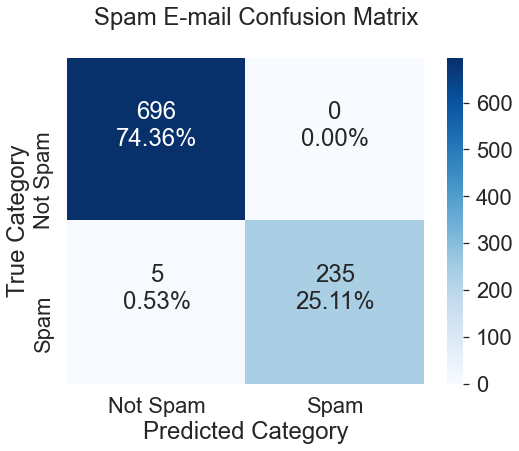

In [2142]:
def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Spam','Spam']
    y_axis_labels = ['Not Spam','Spam']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Spam E-mail Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


nb_cm = confusion_matrix(y_test,model3_predictions)
plot_confusion(nb_cm)

## Using both subject and body tf-idf vectors increased accuracy to 98.72

## Now lets add clustering and see if there's more improvement to accuracy 

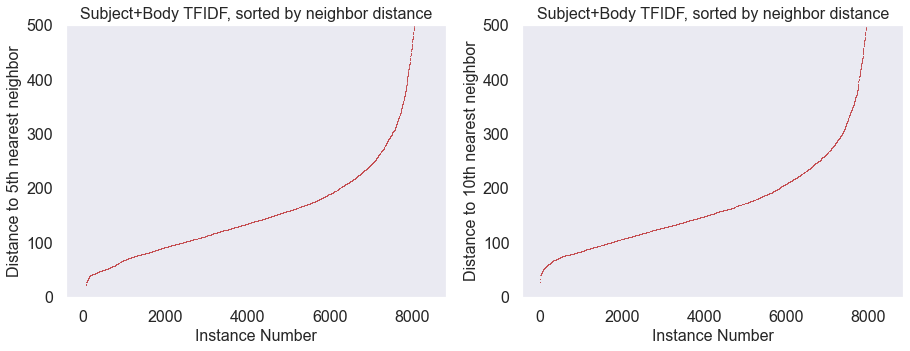

In [2143]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

#=======================================================
# CHANGE THESE VALUES TO ADJUST MINPTS FOR EACH DATASET
X2 = tfidf_subjectbody_train
X2_N = 5
X3 = tfidf_subjectbody_train
X3_N = 10
#=======================================================

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(X2, X2_N, mode='distance') # calculate distance to four nearest neighbors 
X3_knn_graph = kneighbors_graph(X3, X3_N, mode='distance') # calculate distance to four nearest neighbors 

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)

N3 = X3_knn_graph.shape[0]
X3_4nn_distances = np.zeros((N3,1))
for i in range(N2):
    X3_4nn_distances[i] = X3_knn_graph[i,:].max()

X3_4nn_distances = np.sort(X3_4nn_distances, axis=0)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Subject+Body TFIDF, sorted by neighbor distance', fontsize=16)
plt.xlabel('Instance Number', fontsize=16)
plt.ylabel('Distance to {0}th nearest neighbor'.format(X2_N), fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([0, 500])
plt.grid()

plt.subplot(1,2,2)
plt.plot(range(N3), X3_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Subject+Body TFIDF, sorted by neighbor distance', fontsize=16)
plt.xlabel('Instance Number', fontsize=16)
plt.ylabel('Distance to {0}th nearest neighbor'.format(X3_N), fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.ylim([0, 500])

plt.show()

In [2144]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=400, min_samples=5).fit(tfidf_subjectbody_train)
labels_2_125 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_2_125)) - (1 if -1 in labels_2_125 else 0)
print('N Clusters: ',n_clusters_)

N Clusters:  28


In [2145]:
print(np.unique(labels_2_125))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27]


In [2146]:
#NB model can't handle -1 cluster, adding one to cluster numbers
labels_2_125 = labels_2_125 +1

In [2147]:
temp_label_df = pd.DataFrame(labels_2_125)
temp_label_df = temp_label_df.rename(columns={temp_label_df.columns[0]: 'cluster'})
onehot_2_125_train = pd.get_dummies(temp_label_df['cluster'],drop_first=True,prefix="cluster")
onehot_2_125_train.head()


,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2148]:
from sklearn.ensemble import RandomForestClassifier

model_labels_2_125 = RandomForestClassifier()

#X_train = tfidf_subjectbody_train.tocsr()[:,:-2]
X_train = tfidf_subjectbody_train.tocsr()

y_train = labels_2_125

model_labels_2_125.fit(X_train, y_train)

model_labels_2_125_predictions = model_labels_2_125.predict(X_train)

print('Accuracy: ',accuracy_score(model_labels_2_125_predictions, y_train))

Accuracy:  1.0


In [2149]:
test_labels_2_125_predictions = model_labels_2_125.predict(tfidf_subjectbody_test)
test_labels_2_125_predictions.shape

(936,)

In [2150]:
temp_label_df = pd.DataFrame(test_labels_2_125_predictions)
temp_label_df = temp_label_df.rename(columns={temp_label_df.columns[0]: 'cluster'})
onehot_2_125_test = pd.get_dummies(temp_label_df['cluster'],drop_first=True,prefix="cluster")
onehot_2_125_test.head()

,cluster_1,cluster_3,cluster_6,cluster_8,cluster_13,cluster_14,cluster_15,cluster_18,cluster_19,cluster_22
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [2151]:
onehot_2_125_test.shape

(936, 10)

In [2152]:
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in 
    re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [2153]:
train_cluster_columns = onehot_2_125_train.columns
test_cluster_columns = onehot_2_125_test.columns
Difference = set(train_cluster_columns) - set(test_cluster_columns)
print('Difference: ',Difference)

Difference:  {'cluster_2', 'cluster_26', 'cluster_28', 'cluster_9', 'cluster_10', 'cluster_5', 'cluster_11', 'cluster_23', 'cluster_21', 'cluster_24', 'cluster_17', 'cluster_16', 'cluster_27', 'cluster_4', 'cluster_20', 'cluster_25', 'cluster_7', 'cluster_12'}


In [2154]:
onehot_2_125_test = pd.concat([onehot_2_125_test,pd.DataFrame(columns=Difference)])
onehot_2_125_test = onehot_2_125_test.reindex(natural_sort(onehot_2_125_test.columns), axis=1)
onehot_2_125_test = onehot_2_125_test.fillna(0)
onehot_2_125_test.head()

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,cluster_18,cluster_19,cluster_20,cluster_21,cluster_22,cluster_23,cluster_24,cluster_25,cluster_26,cluster_27,cluster_28
0,1.0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0
1,1.0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0
2,1.0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0
3,1.0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0
4,1.0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0


In [2155]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=400, min_samples=10).fit(tfidf_subjectbody_train)
labels_5_150 = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_5_150)) - (1 if -1 in labels_5_150 else 0)
print('N Clusters: ',n_clusters_)

#NB model can't handle -1 cluster, adding one to cluster numbers
labels_5_150 = labels_5_150 +1

N Clusters:  6


In [2156]:
temp_label_df = pd.DataFrame(labels_5_150)
temp_label_df = temp_label_df.rename(columns={temp_label_df.columns[0]: 'cluster'})
onehot_5_150_train = pd.get_dummies(temp_label_df['cluster'],drop_first=True,prefix="cluster")
onehot_5_150_train.head()

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [2157]:
onehot_5_150_train.shape

(8417, 6)

In [2158]:
from sklearn.ensemble import RandomForestClassifier

model_labels_5_150 = RandomForestClassifier()

#X_train = tfidf_subjectbody_train.tocsr()[:,:-2]
X_train = tfidf_subjectbody_train.tocsr()
y_train = labels_5_150

model_labels_5_150.fit(X_train, y_train)

model_labels_5_150_predictions = model_labels_5_150.predict(X_train)

print('Accuracy: ',accuracy_score(model_labels_5_150_predictions, y_train))

Accuracy:  1.0


In [2159]:
test_labels_5_150_predictions = model_labels_5_150.predict(tfidf_subjectbody_test)
test_labels_5_150_predictions.shape

(936,)

In [2160]:
temp_label_df2 = pd.DataFrame(test_labels_5_150_predictions)
temp_label_df2 = temp_label_df2.rename(columns={temp_label_df2.columns[0]: 'cluster'})
onehot_5_150_test = pd.get_dummies(temp_label_df2['cluster'],drop_first=True,prefix="cluster")
onehot_5_150_test.head()

,cluster_1,cluster_2,cluster_4,cluster_5,cluster_6
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [2161]:
onehot_5_150_test.shape

(936, 5)

In [2162]:
train_cluster_columns = onehot_5_150_train.columns
test_cluster_columns = onehot_5_150_test.columns
Difference = set(train_cluster_columns) - set(test_cluster_columns)
print('Difference: ',Difference)

Difference:  {'cluster_3'}


In [2163]:
onehot_5_150_test = pd.concat([onehot_5_150_test,pd.DataFrame(columns=Difference)])
onehot_5_150_test = onehot_5_150_test.reindex(natural_sort(onehot_5_150_test.columns), axis=1)
onehot_5_150_test = onehot_5_150_test.fillna(0)
onehot_5_150_test.head()

,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,1.0,0.0,0,0.0,0.0,0.0
1,1.0,0.0,0,0.0,0.0,0.0
2,1.0,0.0,0,0.0,0.0,0.0
3,1.0,0.0,0,0.0,0.0,0.0
4,1.0,0.0,0,0.0,0.0,0.0


In [2164]:
from scipy.sparse import hstack

print(tfidf_subjectbody_train.shape)
tfidf_subjectbody_train = hstack((tfidf_subjectbody_train, onehot_5_150_train.astype(float), onehot_2_125_train.astype(float)))
print(tfidf_subjectbody_train.shape)


(8417, 1373368)
(8417, 1373402)


In [2165]:
from scipy.sparse import hstack
from scipy import sparse

print(tfidf_subjectbody_test.shape)
tfidf_subjectbody_test = sparse.hstack((tfidf_subjectbody_test, onehot_5_150_test.astype(float), onehot_2_125_test.astype(float)))
print(tfidf_subjectbody_test.shape)

(936, 1373368)
(936, 1373402)


In [2166]:
model4 = MultinomialNB()

X_train = np.nan_to_num(tfidf_subjectbody_train)
y_train = email_modeling.Is_Spam
X_test = np.nan_to_num(tfidf_subjectbody_test)
y_test = email_validation.Is_Spam

model4.fit(X_train, y_train)

model4_predictions = model4.predict(X_test)

print('Accuracy: ',accuracy_score(model4_predictions, y_test))

Accuracy:  0.9946581196581197


## Adding clusters as features did not improve accuracy, still 98.72%


In [2167]:
from sklearn.naive_bayes import ComplementNB
complement_nb = ComplementNB()

X_train = tfidf_subjectbody_train
y_train = email_modeling.Is_Spam
X_test = tfidf_subjectbody_test
y_test = email_validation.Is_Spam

complement_nb.fit(X_train, y_train)

complement_nb_predictions = complement_nb.predict(X_test)

print('Accuracy: ',accuracy_score(complement_nb_predictions, y_test))

Accuracy:  0.9946581196581197


In [2187]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.05, 0.1, 0.5, 1.0], 'fit_prior': ['True', 'False'], 'class_prior' : [None, [.2,.8],[.25, .75]]
         }

complement_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=10, verbose=5)
complement_nb_grid.fit(X_train,y_train)

print('Train Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Train Accuracy : 1.000
Test Accuracy : 0.993
Best Accuracy Through Grid Search : 0.999
Best Parameters :  {'alpha': 0.01, 'class_prior': None, 'fit_prior': 'True'}


In [2169]:
final_model = MultinomialNB(alpha=1, fit_prior=True)

X_train = tfidf_subjectbody_train
y_train = email_modeling.Is_Spam
X_test = tfidf_subjectbody_test
y_test = email_validation.Is_Spam

final_model.fit(X_train, y_train)

final_model_predictions = final_model.predict(X_test)

print('Accuracy: ',accuracy_score(final_model_predictions, y_test))

Accuracy:  0.9946581196581197


In [2170]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_predictions, 
                            target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       696
        Spam       1.00      0.98      0.99       240

    accuracy                           0.99       936
   macro avg       1.00      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



In [2171]:
print(X_test.shape)
print(y_test.shape)

(936, 1373402)
(936,)


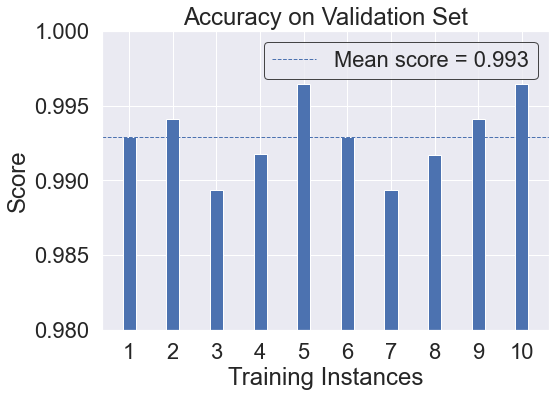

<AxesSubplot:title={'center':'Accuracy on Validation Set'}, xlabel='Training Instances', ylabel='Score'>

In [2172]:
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10)
visualizer = CVScores(final_model, cv=cv, scoring='f1_weighted', title='Accuracy on Validation Set', ylabel='Accuracy on Validation Set')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.score(X_test, y_test) 
plt.ylim([0.98, 1])
plt.ylabel('Accuracy on Validation Set')
plt.title('Insert')
visualizer.show()           # Finalize and render the figure


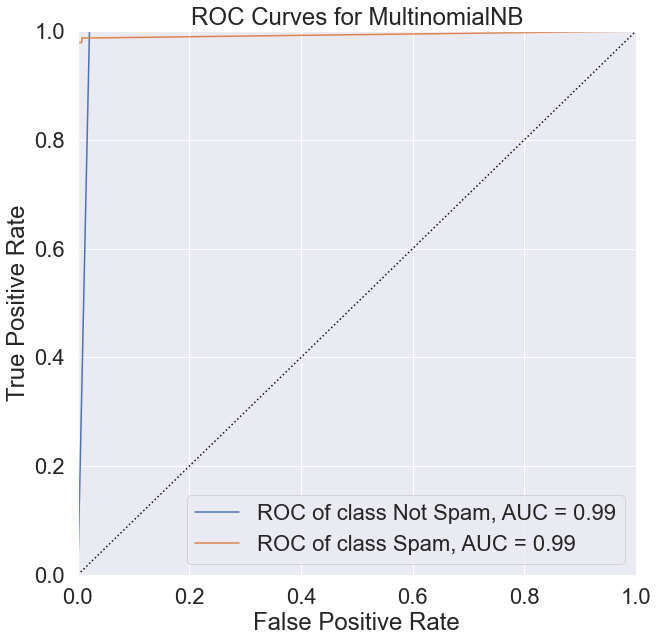

<AxesSubplot:title={'center':'ROC Curves for MultinomialNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [2173]:
from yellowbrick.classifier import ROCAUC

viz = ROCAUC(final_model, per_class=True, classes=['Not Spam', 'Spam'], macro=False, micro=False, size=(720, 720))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

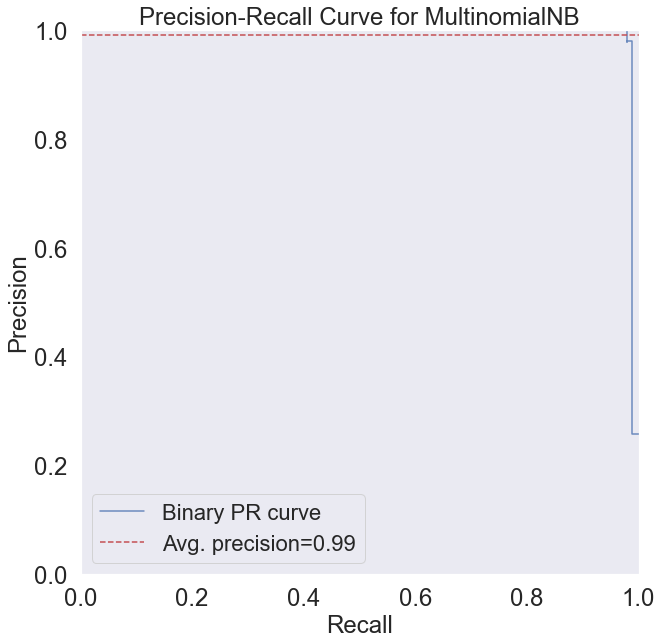

<AxesSubplot:title={'center':'Precision-Recall Curve for MultinomialNB'}, xlabel='Recall', ylabel='Precision'>

In [2174]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(final_model, per_class=True, classes=['Not Spam', 'Spam'], size=(720, 720))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
for legend in viz.ax.texts:
    legend.set_fontsize(24)
for xtick,ytick in zip(viz.ax.xaxis.get_major_ticks(),viz.ax.yaxis.get_major_ticks()):
    xtick.label.set_fontsize(24) 
    ytick.label.set_fontsize(24)
viz.show()

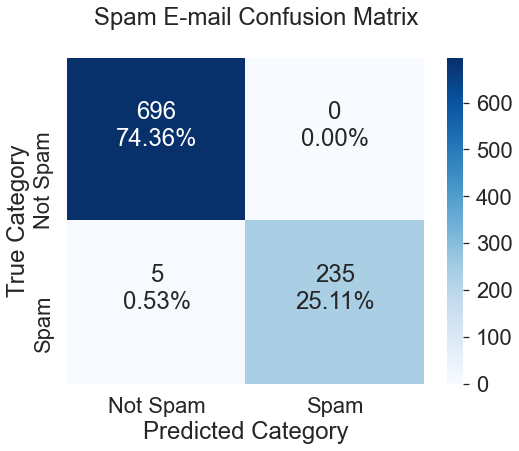

In [2175]:
validation_predictions = final_model.predict(X_test)
validation_prediction_prob = final_model.predict_proba(X_test)


def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Spam','Spam']
    y_axis_labels = ['Not Spam','Spam']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Spam E-mail Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


nb_cm = confusion_matrix(y_test,validation_predictions)
plot_confusion(nb_cm)

In [2176]:
validation_prediction_prob.shape

(936, 2)

In [2177]:
validation_prediction_prob[:,1].shape

(936,)

In [2178]:
from sklearn.metrics import classification_report
print(classification_report(y_test,validation_predictions, 
                            target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.99      1.00      1.00       696
        Spam       1.00      0.98      0.99       240

    accuracy                           0.99       936
   macro avg       1.00      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936



In [2179]:
print(email_validation.shape)
email_validation.head()


(936, 5)


,file_id,subject,body,Group,Is_Spam
3840,00610.ef7ca9c067516bdd7e29aebc488d1edd,boycotting yahoo,Because of this: http://hrw.org/press/2002/08/...,easy_ham,0
1129,00714.15dea0aa20430242a5527e0f928eb8d4,"Re: ""Ouch. Ouch. Ouch. Ouch. Ouch....""(was Re:...",At a pub frequented by the members of the EU t...,easy_ham_2,0
3005,00886.6d792e0aa2cd6975ef5e050f7b0173b5,"Documentum Acquires E-Room, Melding Content, C...",Don't know much about eRoom - but there is th...,easy_ham,0
2491,2222.21412f6d911e6718ab62011cbc6d9eea,Synthetic vitamin boosts bone growth,"URL: http://www.newsisfree.com/click/-1,841285...",easy_ham,0
1,00659.02e6dd777f837798533eae8f3b6a0491,[WM] The MIME information you requested (last ...,----------------------------------------------...,easy_ham_2,0


In [2180]:
final_predictions = validation_predictions.reshape(len(validation_predictions),1)
final_predictions = pd.DataFrame(final_predictions)
final_predictions = final_predictions.rename(columns={final_predictions.columns[0]: 'final_prediction'})
final_predictions.reset_index(drop=True, inplace=True)
email_validation.reset_index(drop=True, inplace=True)

final_predictionsprediction_proba = validation_prediction_prob[:,1]
final_predictionsprediction_proba = pd.DataFrame(final_predictionsprediction_proba)
final_predictionsprediction_proba = final_predictionsprediction_proba.rename(columns={final_predictionsprediction_proba.columns[0]: 'prediction_proba'})
final_predictionsprediction_proba.reset_index(drop=True, inplace=True)

#final_predictions.shape
predictions_df = pd.concat([email_validation, final_predictions, final_predictionsprediction_proba], axis=1)
predictions_df.head(20)

,file_id,subject,body,Group,Is_Spam,final_prediction,prediction_proba
0,00610.ef7ca9c067516bdd7e29aebc488d1edd,boycotting yahoo,Because of this: http://hrw.org/press/2002/08/...,easy_ham,0,0,0.0
1,00714.15dea0aa20430242a5527e0f928eb8d4,"Re: ""Ouch. Ouch. Ouch. Ouch. Ouch....""(was Re:...",At a pub frequented by the members of the EU t...,easy_ham_2,0,0,0.0
2,00886.6d792e0aa2cd6975ef5e050f7b0173b5,"Documentum Acquires E-Room, Melding Content, C...",Don't know much about eRoom - but there is th...,easy_ham,0,0,0.0
3,2222.21412f6d911e6718ab62011cbc6d9eea,Synthetic vitamin boosts bone growth,"URL: http://www.newsisfree.com/click/-1,841285...",easy_ham,0,0,0.0
4,00659.02e6dd777f837798533eae8f3b6a0491,[WM] The MIME information you requested (last ...,----------------------------------------------...,easy_ham_2,0,0,0.0
5,0031.af5b387661e1f58d3787ac41139106e5,Re: [ILUG] Sun Solaris..,"> On Thu, 22 Aug 2002, John P. Looney wrote: ...",easy_ham,0,0,0.0
6,00285.0a23190ebe54452ab48f8fc1e20402f5,"Hi Janet, are you going to call me? ...",Do you dream of working for yourself? From the...,spam_2,1,1,1.0
7,01527.81281cede1b20e6bbfd9f53ee846f815,[SAdev] [Bug 1052] New: bondedsender.com is a ...,http://www.hughes-family.org/bugzilla/show_bug...,easy_ham,0,0,0.0
8,00338.5f65cc2aed42a1472d2c279f925da35a,Re: We Pay your bills :o) [k9lej],"=DDyi g=FCnler =20 D=DCNYA Gazetesi, i=E7inde...",spam_2,1,1,1.0
9,01352.875dff8a1fd32766be05e136950add70,ADV: Lowest life insurance rates available! ...,Lowest rates available for term life insurance...,spam_2,1,1,1.0


In [2181]:
false_predictions = predictions_df[predictions_df.Is_Spam != predictions_df.final_prediction]
print(false_predictions.shape)
false_predictions.head(15)

(5, 7)


,file_id,subject,body,Group,Is_Spam,final_prediction,prediction_proba
220,00106.09988f439b8547dc90efb1530c02329b,Major Stock Play,We attempted to deliver this message to you wi...,spam_2,1,0,3.360162e-233
530,01108.0a4bf099b98c488b65e8d6ca685d6867,The Ultimate in PC Security and Surveillance.,PLEASE VISIT WWW.NOK-NOK.NET Nok-Nok :::: The...,spam_2,1,0,0.000000e+00
602,00529.0c8a07bb7b14576063ba0c1c4079e209,Re: change of plans,"Hello you two, I am so sorry Catherine for no...",spam_2,1,0,0.000000e+00
663,01022.55c9eda45ef3de55b8c27c214a1fc305,ISA Article on Embedded Real-Time Linux Automa...,Industrial LINUX News: The June issue of the...,spam_2,1,0,5.146084e-238
712,00771.e33fd0de6b6c763a697a4fba307091d0,[SA] EM1- Aren't we accorded equal opportunity...,Aren't Asian Pacfic Americans (APAs) accorde...,spam_2,1,0,0.000000e+00


((array([-3.17847195e+00, -2.91178630e+00, -2.76286743e+00, -2.65778855e+00,
         -2.57577945e+00, -2.50812533e+00, -2.45031118e+00, -2.39968470e+00,
         -2.35455060e+00, -2.31375732e+00, -2.27648567e+00, -2.24213148e+00,
         -2.21023589e+00, -2.18044199e+00, -2.15246646e+00, -2.12608055e+00,
         -2.10109677e+00, -2.07735950e+00, -2.05473807e+00, -2.03312169e+00,
         -2.01241556e+00, -1.99253792e+00, -1.97341774e+00, -1.95499291e+00,
         -1.93720879e+00, -1.92001705e+00, -1.90337474e+00, -1.88724349e+00,
         -1.87158888e+00, -1.85637994e+00, -1.84158866e+00, -1.82718964e+00,
         -1.81315979e+00, -1.79947801e+00, -1.78612502e+00, -1.77308310e+00,
         -1.76033598e+00, -1.74786864e+00, -1.73566721e+00, -1.72371883e+00,
         -1.71201158e+00, -1.70053439e+00, -1.68927693e+00, -1.67822957e+00,
         -1.66738331e+00, -1.65672973e+00, -1.64626093e+00, -1.63596951e+00,
         -1.62584850e+00, -1.61589135e+00, -1.60609187e+00, -1.59644424e+00,

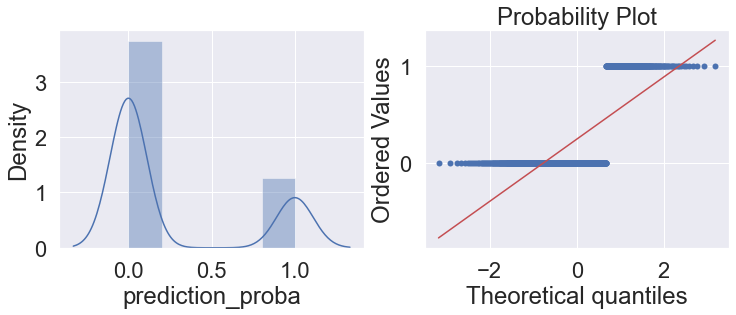

In [2182]:
import scipy.stats as stats

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.distplot(predictions_df['prediction_proba'], ax=ax[0])
stats.probplot(predictions_df['prediction_proba'], dist="norm", plot=ax[1])


Accuracy:  0.9946581196581197


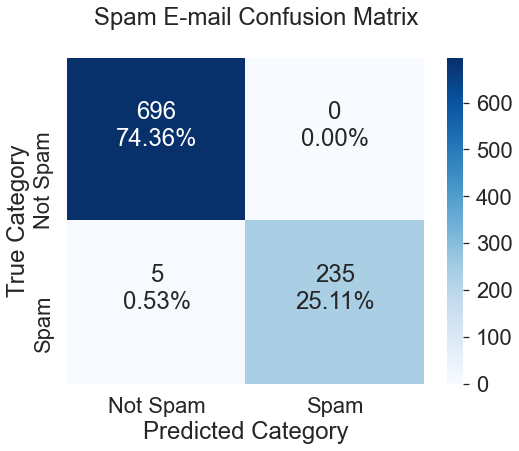

In [2183]:
predictions_df['prob_cutoff_predictions'] = 0
predictions_df.prob_cutoff_predictions[predictions_df.prediction_proba > 1e-5] = 1

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Spam','Spam']
    y_axis_labels = ['Not Spam','Spam']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Spam E-mail Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


nb_cm = confusion_matrix(y_test,predictions_df.prob_cutoff_predictions)
print('Accuracy: ',accuracy_score(predictions_df.prob_cutoff_predictions, y_test))
plot_confusion(nb_cm)

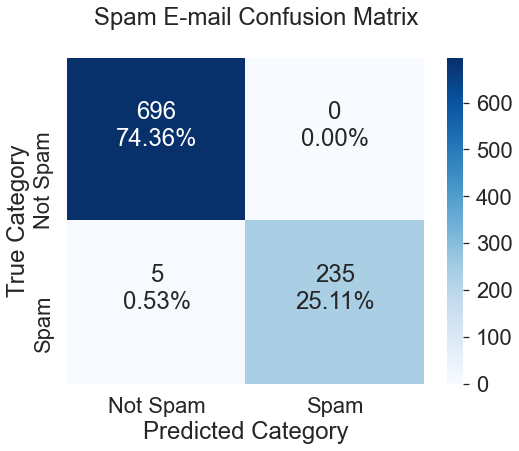

In [2184]:
predictions_df['prob_cutoff_predictions'] = 0
predictions_df.prob_cutoff_predictions[predictions_df.prediction_proba > 1e-45] = 1

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Spam','Spam']
    y_axis_labels = ['Not Spam','Spam']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Spam E-mail Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


nb_cm = confusion_matrix(y_test,predictions_df.prob_cutoff_predictions)
plot_confusion(nb_cm)

smote

In [2185]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 22)

print("Before OverSampling, counts of label '0': {}".format(sum(email_modeling.Is_Spam == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(email_modeling.Is_Spam == 1)))

X_balanced, y_balanced = sm.fit_resample(tfidf_subjectbody_train, email_modeling['Is_Spam'].ravel()) 

print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))
print("After OverSampling, counts of label '1': {} \n".format(sum(y_balanced == 1)))

smote_model = MultinomialNB(alpha=1, fit_prior=True)

X_train = X_balanced
y_train = y_balanced
X_test = tfidf_subjectbody_test
y_test = email_validation.Is_Spam

smote_model.fit(X_train, y_train)

smote_model_predictions = smote_model.predict(X_test)

print('Accuracy: ',accuracy_score(smote_model_predictions, y_test))

Before OverSampling, counts of label '0': 6258
Before OverSampling, counts of label '1': 2159 

After OverSampling, counts of label '0': 6258
After OverSampling, counts of label '1': 6258 

Accuracy:  0.9925213675213675


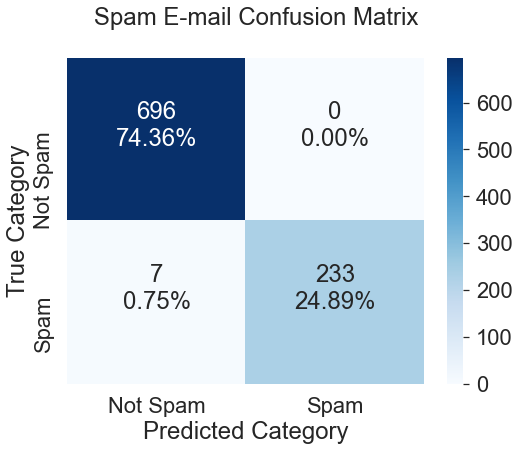

In [2186]:
def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Spam','Spam']
    y_axis_labels = ['Not Spam','Spam']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Spam E-mail Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category") 


nb_cm = confusion_matrix(y_test,smote_model_predictions)
plot_confusion(nb_cm)